In [1]:
import numpy as np
import pandas as pd
from apyori import apriori
import matplotlib.pyplot as plt
import seaborn as sns

# Reading data from CSV file

In [2]:
df = pd.read_csv(r"Market_Basket_Optimisation.csv",header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [5]:
df.isnull().sum()

0        0
1     1754
2     3112
3     4156
4     4972
5     5637
6     6132
7     6520
8     6847
9     7106
10    7245
11    7347
12    7414
13    7454
14    7476
15    7493
16    7497
17    7497
18    7498
19    7500
dtype: int64

# Getting Transaction list

In [6]:
transactions = []
for i in range(0, 7501):
    transactions.append([str(df.values[i,j]) for j in range(0, 20)])

# Creating an Apriori Model

In [7]:
tran_rules = apriori(transactions, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)
results = list(tran_rules)
print(results[:50])

[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]), RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]), RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]), RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0.24

# Visualising the results

In [8]:
def inspect(results):
    prod_1 = [tuple(result[2][0][0])[0] for result in results]
    prod_2 = [tuple(result[2][0][1])[0] for result in results]
    conf = [result[2][0][2] for result in results]
    lift = [result[2][0][3] for result in results]
    support = [result[1] for result in results]
    return list(zip(prod_1, prod_2, support,lift,conf))

In [9]:
res_df = pd.DataFrame(inspect(results), columns = ['Prod_1', 'Prod_2', 'Support', 'Lift', 'Confidence'])
res_df.nlargest(n = 10, columns = 'Support')

,Prod_1,Prod_2,Support,Lift,Confidence
4,herb & pepper,ground beef,0.015998,3.291994,0.323450
43,herb & pepper,ground beef,0.015998,3.291994,0.323450
30,spaghetti,ground beef,0.008666,3.165328,0.311005
95,spaghetti,ground beef,0.008666,3.165328,0.311005
7,whole wheat pasta,olive oil,0.007999,4.122410,0.271493
60,whole wheat pasta,nan,0.007999,4.130772,0.271493
34,mineral water,frozen vegetables,0.007199,3.200616,0.305085
55,spaghetti,olive oil,0.007199,3.082509,0.203008
102,mineral water,frozen vegetables,0.007199,3.200616,0.305085
128,spaghetti,nan,0.007199,3.088761,0.203008


# Plotting the graph

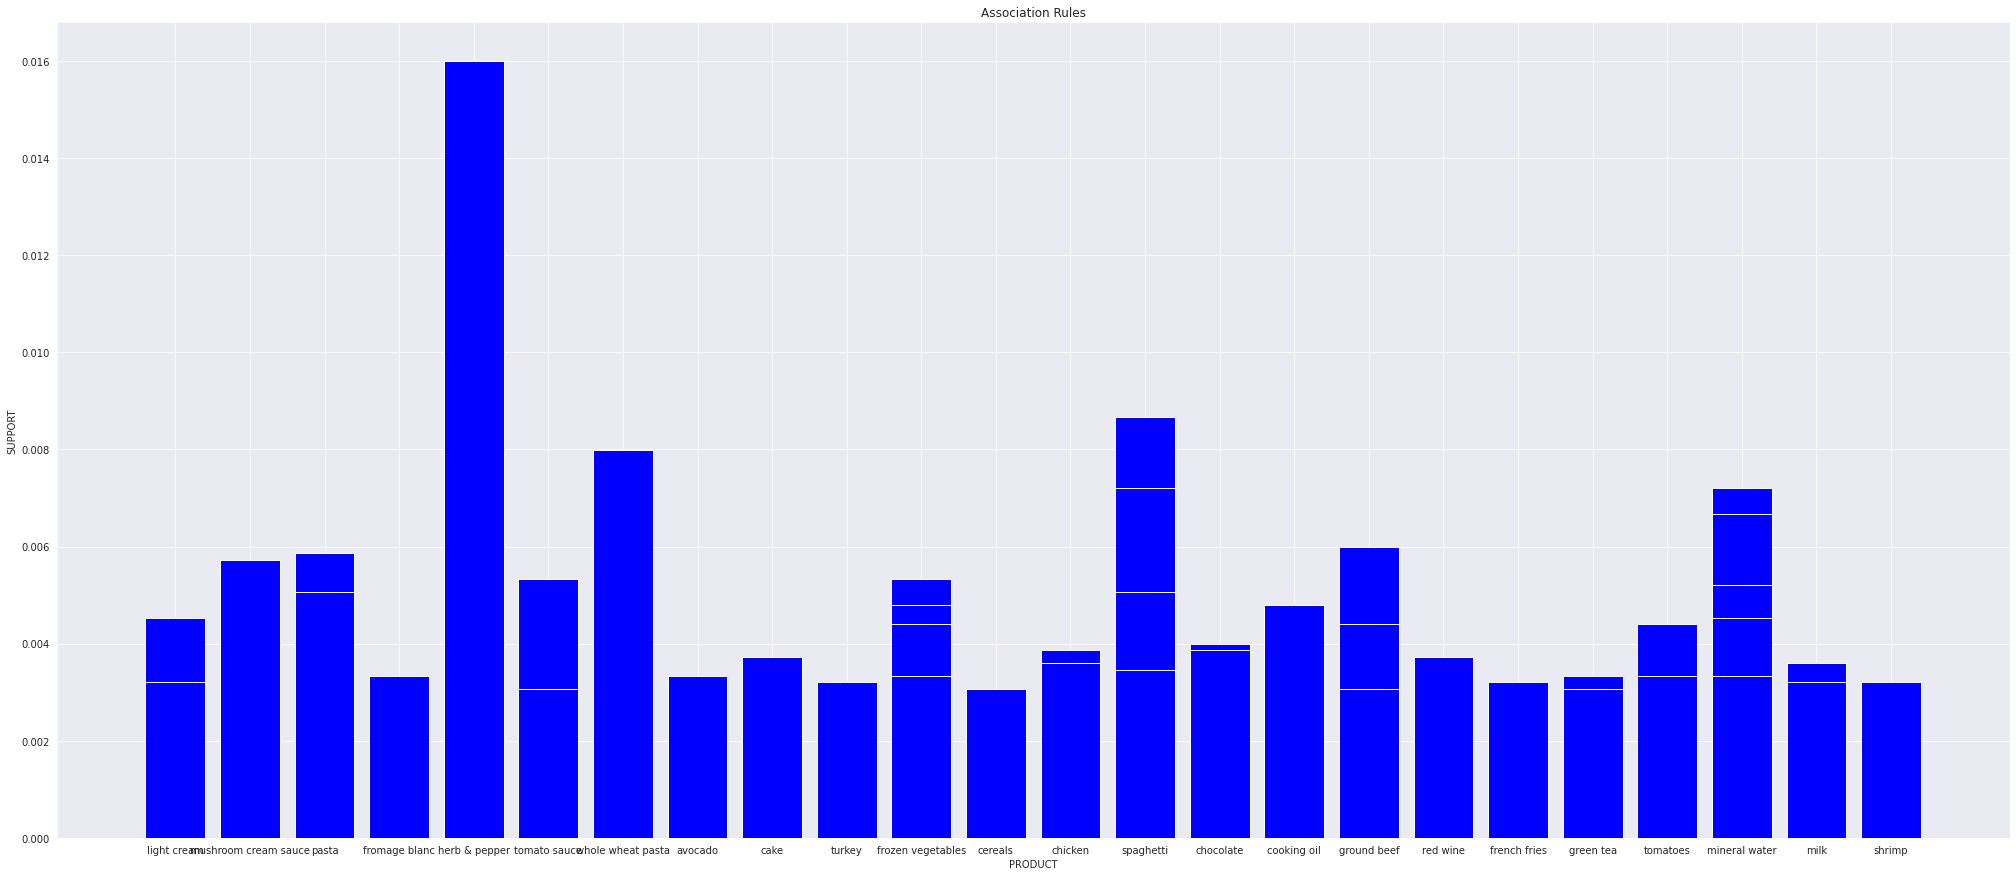

In [10]:
sns.set_style('darkgrid')
plt.figure(figsize=(35, 15))
plt.title('Association Rules')
plt.xlabel('PRODUCT')
plt.ylabel('SUPPORT')
plt.bar(res_df['Prod_1'], res_df['Support'], color='blue')
plt.show()